2# Projet numérique III : câble sous-marin

#### Louis Blazejczak, Emmanuel Gardin

## Questions théoriques

#### 1.
La loi forte des grands nombres nous autorise à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles. 

#### 2.

On considère le vecteur gaussien $Z_{1} = (Z(x_{j1}), Z(x_{j2}), ..., Z(x_{jn}))$ et le vecteur $Z_{2}$ des composantes de $Z$ qui ne sont pas connues. On réordonne $Z$ de manière à ce que les termes de $Z1$ soient les n derniers termes de Z.
On note $C$ la matrice de covariance définie positive de $Z$.
$C$ peut se décomposer en blocs :
\begin{align}
C  = 
\begin{pmatrix} 
C_{Z_{2}} & C_{Z_{2},Z_{1}} \\ C_{Z_{1},Z_{2}} & C_{Z_{1}}
\end{pmatrix}
\end{align}

La loi conditionnelle du vecteur des composantes de  $Z$ correspondant aux points de discrétisation sans observation connaissant les valeurs prises par les composantes aux sites d'observation s'écrit alors :


$f_{Z_{2}|Z_{1} = z_{1}}(z_{2}) = \frac{1}{(2 \pi)^{n/2} \sqrt{det(CS_{Z_{2}})}}exp\left(- \frac{1}{2}\left(z_{2}- \Psi(z_1)\right)^{t}CS_{Z_{2}}^{-1}\left(z_{2}- \Psi(z_1)\right)\right)$

où $CS_{Z_{2}}$ est le complément de Schur du bloc $C_{Z_{2}}$ : $CS_{Z_{2}} = C_{Z_{2}} - C_{Z_{2},Z_{1}}C_{Z_{1}}^{-1}C_{Z_{1},Z_{2}}$ et $\Psi$ est l'espérance conditionnelle du vecteur des sites sans observation $Z_{2}$ sachant $Z_{1}$

#### 3.

Soit $Y = (Y_{1}, ..., Y_{p})$ un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1. $Z = m + RY$ où $R$ est une matrice $p \times p$ et $m$ est un vecteur de taille $p$.
Alors $Z$ est gaussien, comme combinaison linéaire de variables gaussiennes, $E(Z) = E(m + RY) = m$ et $V(Z) = E((RY)^{2}) = RI_{p}R^{T} = RR^{T}$. On note $C = RR^{t}$.

La loi $f_{Z}$ de $Z$ est alors :

\begin{equation}
f_{Z}(z) = \frac{1}{(2 \pi)^{p/2} \sqrt{det(C)}}exp(- \frac{1}{2}(z-m)^{t}C^{-1}(x-m))
\end{equation}

#### 4.

On souhaite simuler un vecteur gaussien $Z = (Z(x_{0}), ..., Z(x_{p}))$ à valeurs dans ${\rm I\!R}^p$, d'espérance $m$ et de matrice de covariance $C$ définie positive données. D'après la question précédente, on peut simuler un vecteur gaussien quelconque à partir d'un vecteur gaussien $Y$ de composantes indépendantes, d'espérances nulles et de variance 1 si on peut trouver une matrice $R$ telle que $C = R \times R^{T}$, car dans ce cas $Z$ a la même loi que $m + R \times Y$. 

Or, $C$ étant symétrique définie positive, il existe une (unique) matrice $R$ vérifiant cela (en effet, le théorème spectral permet de diagonaliser $C = P \Delta P^{T}$ en une matrice diagonale $\Delta$ à coefficients diagonaux strictement positifs, on pose alors $R = P \times \sqrt{\Delta}$ où $\sqrt{\Delta}$ est la matrice diagonale dont les coefficients sont les racines carrées des coefficients de $\Delta$). Il est donc possible de simuler $Z$ à partir de la simulation de $Y$.



## Implémentation

In [22]:
# Chargement des dépendances

import numpy as np
import math
import matplotlib.pyplot as plt

# Discrétisation

A = 0
B = 500
N = 101
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

#Paramètres du modèle

mu = -5
a = 50
sigma2 = 12

# Données

observation_indexes = [0, 20, 40, 60, 80, 100]
depth = np.array([0, -4, -12.8, -1, -6.5, 0])

# Indices des composantes correspondant aux observations et aux composantes non observées

unknown_indexes = list(set(discretization_indexes)-set(observation_indexes))

In [8]:
#1
def cov(distance, a, sigma2):
    covariance = np.zeros((101, 101))
    for i in range(0, len(covariance)):
        for j in range(0, len(covariance[0])):
            covariance[i][j] = sigma2*math.exp(-abs(distance[i][j])/a)
    return covariance

In [9]:
#2
distance = np.zeros((101, 101))
for i in range(0, 101):
    for j in range(0, 101):
        distance[i][j] = abs((i-j)*Delta)

In [10]:
#3
C = cov(distance, a, sigma2)
print(C)

[[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]]


In [12]:
#4
C_Z1, distanceZ1 = np.zeros((len(observation_indexes),len(observation_indexes))), np.zeros((len(observation_indexes),len(observation_indexes)))
C_Z2, distanceZ2 = np.zeros((len(unknown_indexes),len(unknown_indexes))), np.zeros((len(unknown_indexes),len(unknown_indexes)))
C_Z1_Z2, distanceZ1_Z2 = np.zeros((len(observation_indexes),len(unknown_indexes))), np.zeros((len(observation_indexes),len(unknown_indexes)))

for i in range(len(observation_indexes)):
    for j in range(len(observation_indexes)):
        C_Z1[i][j] = C[observation_indexes[i]][observation_indexes[j]]

for i in range(len(observation_indexes)):
    for j in range(len(unknown_indexes)):
        C_Z1_Z2[i][j] = C[observation_indexes[i]][unknown_indexes[j]]
        
for i in range(len(unknown_indexes)):
    for j in range(len(unknown_indexes)):
        C_Z2[i][j] = C[unknown_indexes[i]][unknown_indexes[j]]



In [27]:
mZ1 = [mu for i in range(len(observation_indexes))]
mZ2 = [mu for i  in range(len(unknown_indexes))]
Z1 = depth
C_Z2_Z1 = C_Z1_Z2.T
Esp_Z2sachantZ1 = mZ2 - (np.dot(C_Z2_Z1,np.linalg.inv(C_Z1)).dot(Z1-mZ1))

Esp_Z_Z1 = {}
index_Z1 = 0
index_Z2 = 0
for i in range(101):
    if i in observation_indexes:
        Esp_Z_Z1[f"{i}"] = depth[index_Z1]
        index_Z1 += 1
    else:
        Esp_Z_Z1[f"{i}"] = Esp_Z2sachantZ1[index_Z2]
        index_Z2 += 1
        
for index in Esp_Z_Z1:
    print(f"{index} :", Esp_Z_Z1[index])

0 : 0.0
1 : -9.533116651550738
2 : -9.111602258183323
3 : -8.73123816217305
4 : -8.388217551802256
5 : -8.07910736150915
6 : -7.8008139126137515
7 : -7.5505519507418555
8 : -7.325816770063098
9 : -7.1243591453531465
10 : -6.944162820991656
11 : -6.78342433159834
12 : -6.640534952345279
13 : -6.514064598298129
14 : -6.4027475116454315
15 : -6.305469593569002
16 : -6.221257253968496
17 : -6.149267667444443
18 : -6.0887803380183785
19 : -6.03918988816691
20 : -4.0
21 : -5.685679067215545
22 : -5.378220641000476
23 : -5.074547574084887
24 : -4.771620604347046
25 : -4.466407936856543
26 : -4.155854900651614
27 : -3.8368533765654416
28 : -3.5062106901248544
29 : -3.1606176581911107
30 : -2.796615469542789
31 : -2.4105610679305363
32 : -1.9985906911456506
33 : -1.5565812011892435
34 : -1.0801088185213112
35 : -0.5644048473882171
36 : -0.004307949112767773
37 : 0.6057875143180462
38 : 1.2719875833624048
39 : 2.0009598122288823
40 : -12.8
41 : 1.9181057135684059
42 : 1.1054501543738349
43 : 0.3

#### 6

La matrice de covariance conditionnelle cherchée est : 
\begin{equation}
C_{Z_{2} | Z_{1}} = C_{Z_{2}} - C_{Z_{2}, Z_{1}} \times C_{Z_{1}}^{-1} \times C_{Z_{1}, Z_{2}}
\end{equation}

D'où l'implémentation suivante.

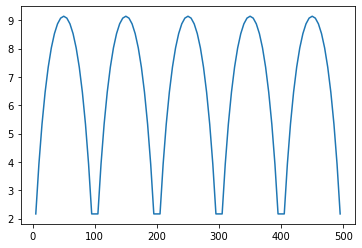

In [28]:
def mat_cov_condi():
    M = C_Z2 - ( (C_Z2_Z1.dot(np.linalg.inv(C_Z1))).dot(C_Z1_Z2) )
    return M

C_Z2sachantZ1 = mat_cov_condi()

position = [i*Delta for i in unknown_indexes]
variance = [C_Z2sachantZ1[i][i] for i in range(95)]

plt.plot(position, variance)

Comme ici, $\Delta = 5$ (m), on obtient logiquement une variance nulle aux points d'observation situés tous les 100m. De la même façon, il paraît logique que la variance augmente lorsqu'on s'éloigne de ces points puisque la position est moins connue loin des sites d'observation.

In [30]:
def longueur(Z, Delta):
    length = 0
    for i in range(len(Z)-1):
        length += math.sqrt(Delta^2+(Z[i+1]-Z[i])^2)
    return length